In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from pydataset import data

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# df = pd.read_clipboard(sep = ',')

In [3]:
# df.to_csv('lemonade.csv')

In [4]:
df = pd.read_csv('lemonade.csv', index_col = 0)

In [5]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


# Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

## the only one that doesn't make sense to do them on is price

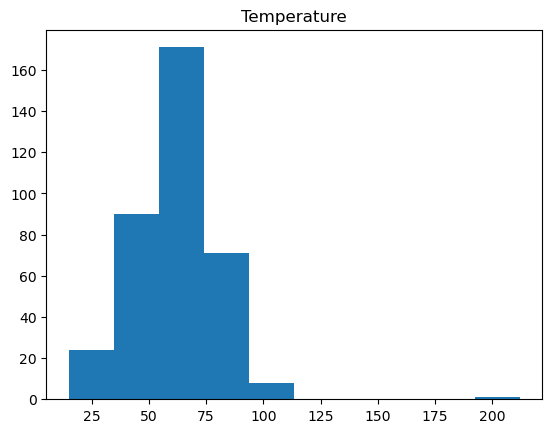

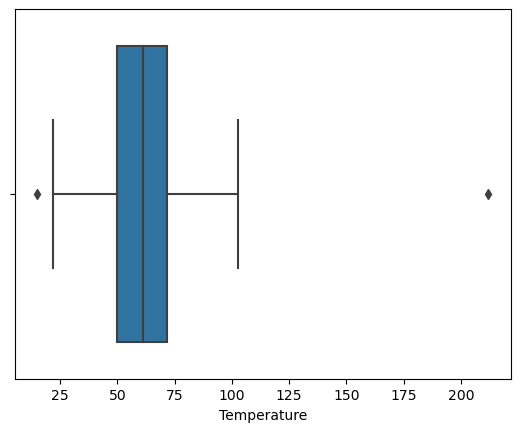

------------


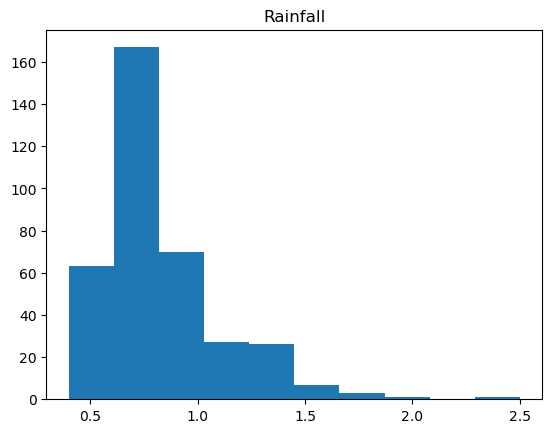

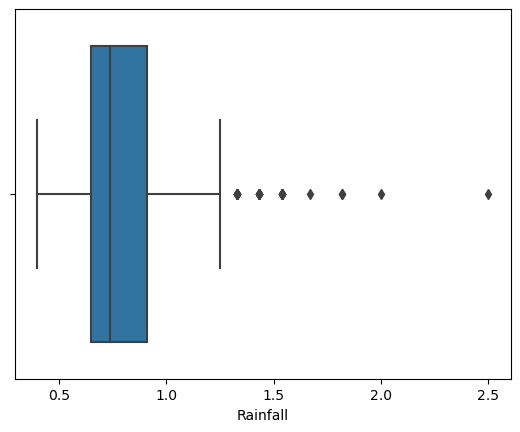

------------


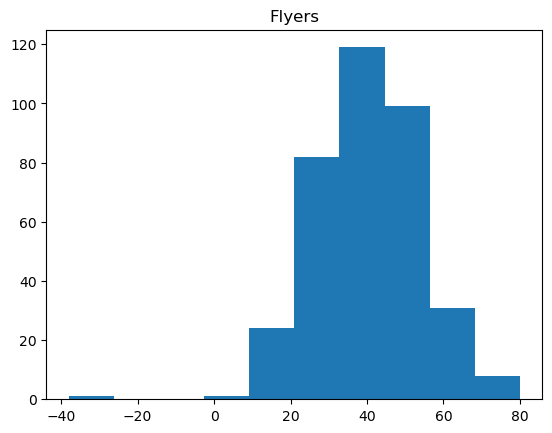

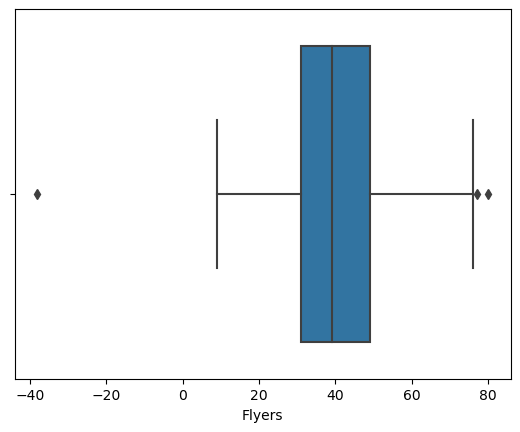

------------


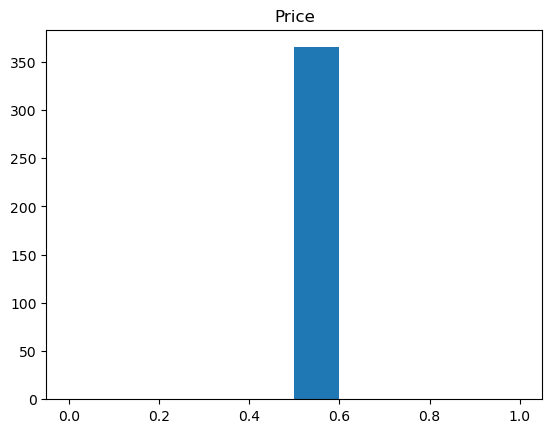

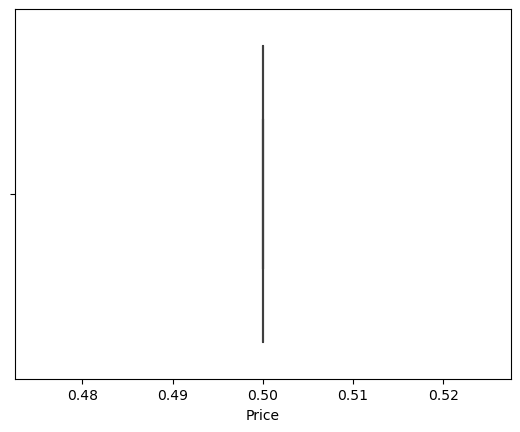

------------


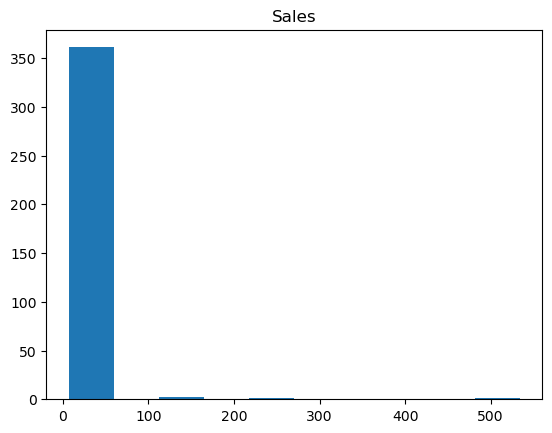

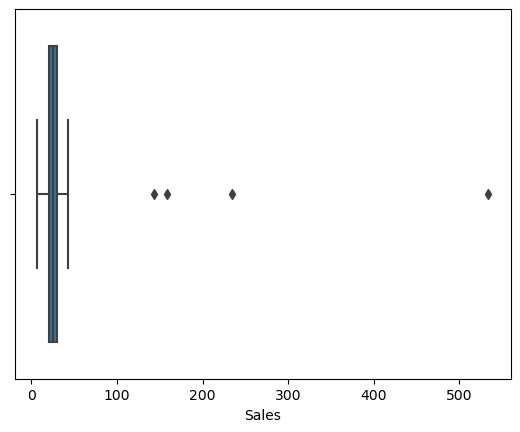

------------


In [6]:
df_2 = df.select_dtypes(exclude='object')
cols = df_2.columns.to_list()
for col in cols:
    plt.hist(df[col])
    plt.title(col.replace('_',' ').capitalize())
    plt.show()
    
    sns.boxplot(data=df, x=col)
    plt.show()
    print('------------')

## it wouldnt make sense to take the bottom off of rainfall, temperature, or sales. Because all of their outliers seem to be upper bound



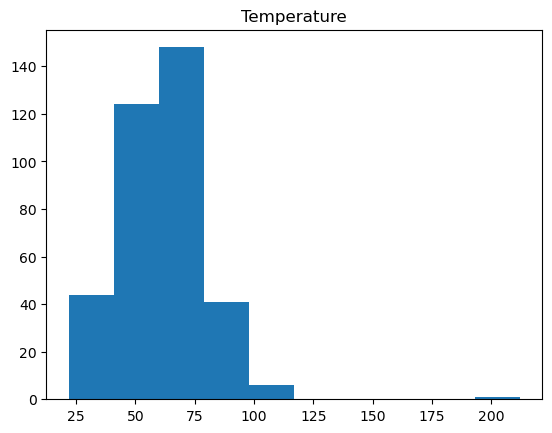

Column Name: Temperature      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
359         28.9      1.43      23    0.5     13
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13

[364 rows x 5 columns] 



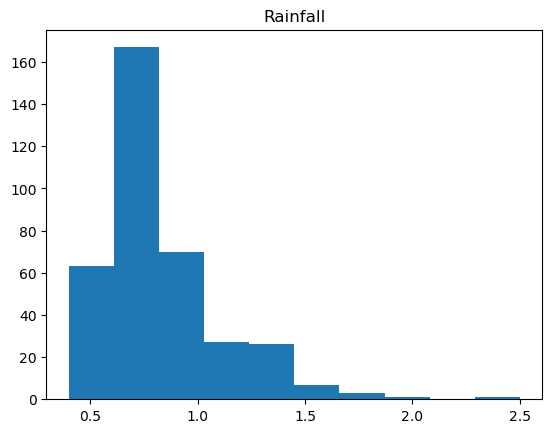

Column Name: Rainfall      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[365 rows x 5 columns] 



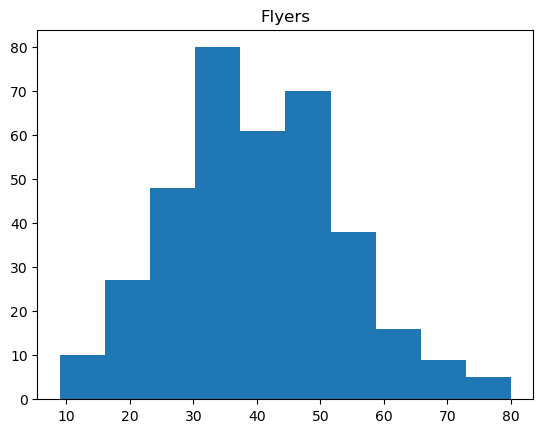

Column Name: Flyers      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[364 rows x 5 columns] 



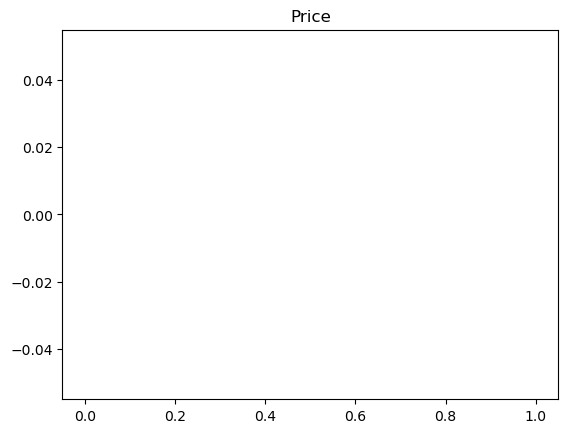

Column Name: Price Empty DataFrame
Columns: [Temperature, Rainfall, Flyers, Price, Sales]
Index: [] 



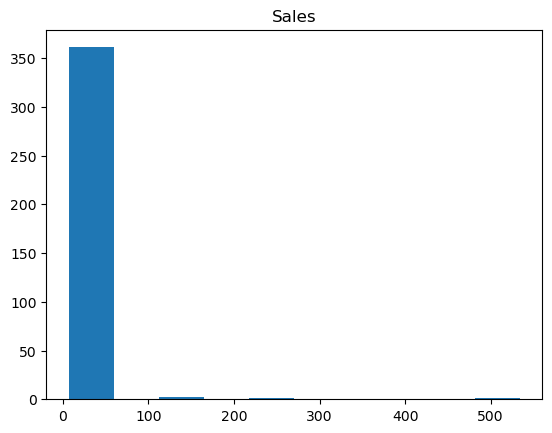

Column Name: Sales      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[365 rows x 5 columns] 



In [58]:
df = pd.read_csv('lemonade.csv', index_col = 0)

inner_multiplier = 1.5

for col in cols:
    df = pd.read_csv('lemonade.csv', index_col = 0)
    df = df.select_dtypes(exclude='object')
    
    q1 = df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3- q1
    
    inner_lower_fence = q1 - (inner_multiplier * iqr)
    df = df[(df[col] > inner_lower_fence)]
    
    plt.hist(df[col])
    plt.title(col.replace('_',' ').capitalize())
    plt.show()
    print(f'Column Name: {col}', df ,'\n')

## I would keep all the lower bound outliers for rainfall, temperature, or sales because of how they are distributed.

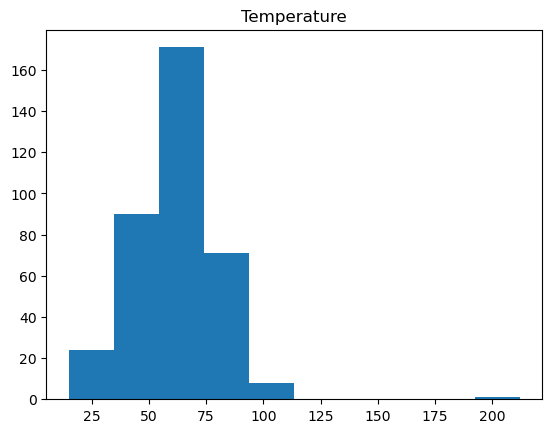

Column Name: Temperature      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[365 rows x 5 columns] 



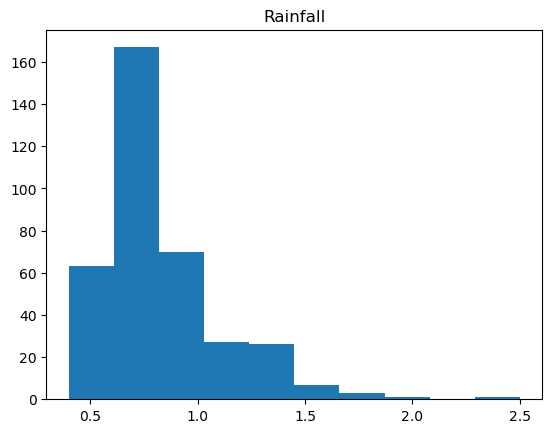

Column Name: Rainfall      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[365 rows x 5 columns] 



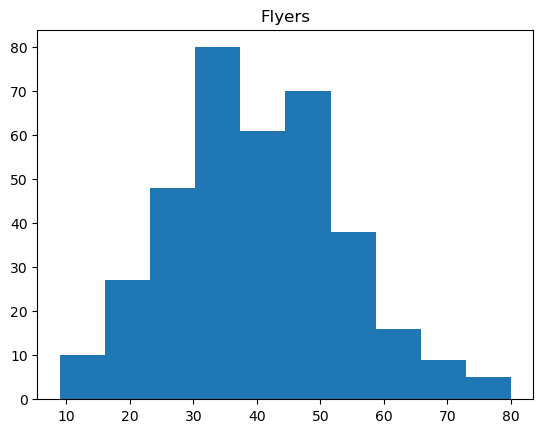

Column Name: Flyers      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[364 rows x 5 columns] 



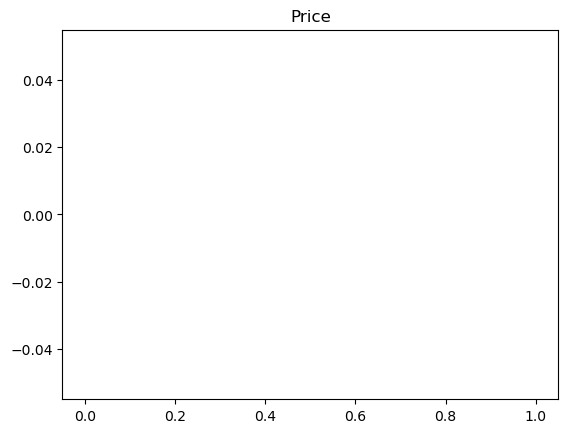

Column Name: Price Empty DataFrame
Columns: [Temperature, Rainfall, Flyers, Price, Sales]
Index: [] 



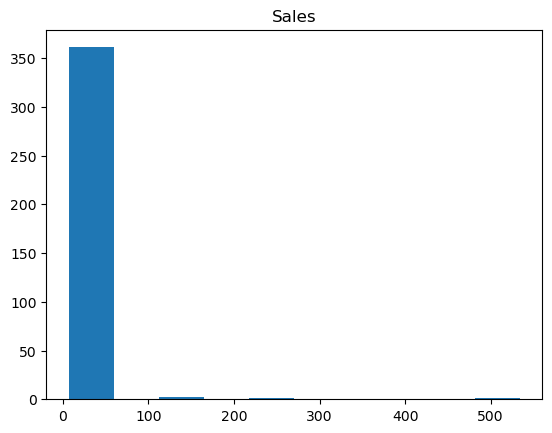

Column Name: Sales      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[365 rows x 5 columns] 



In [57]:
df = pd.read_csv('lemonade.csv', index_col = 0)
inner_multiplier = 3


for col in cols:
    df = pd.read_csv('lemonade.csv', index_col = 0)
    df = df.select_dtypes(exclude='object')
    
    q1 = df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3- q1
    
    inner_lower_fence = q1 - (inner_multiplier * iqr)
    df = df[(df[col] > inner_lower_fence)]
    
    plt.hist(df[col])
    plt.title(col.replace('_',' ').capitalize())
    plt.show()
    print(f'Column Name: {col}', df ,'\n')

## I would keep flyers and price the same without removing upper outliers

Column Name: Temperature        Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21 

Column Name: Rainfall      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
5           25.3      1.54      23    0.5     11
6           32.9      1.54      19    0.5     13
10          32.6      1.54      23    0.5     12
11          38.2      1.33      16    0.5     14
12          37.5      1.33      19    0.5     15
15          30.6      1.67      24    0.5     12
16          32.2      1.43      26    0.5     14
19          31.6      1.43      20    0.5     12
23          28.6      1.54      20    0.5     12
27          34.9      1.33      15    0.5     13
28          35.2      1.33      27    0.5     14
337         34.9      1.54      16    0.5     13
338         22.0      1.82      1

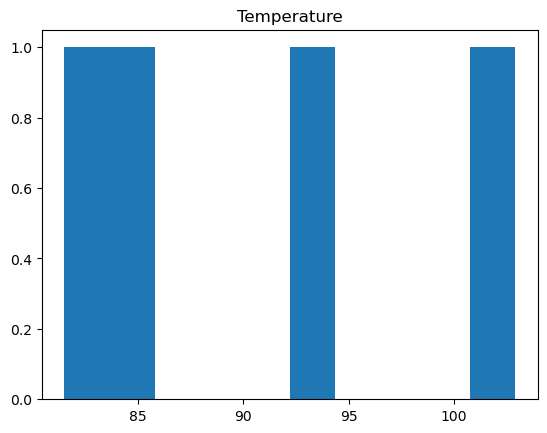

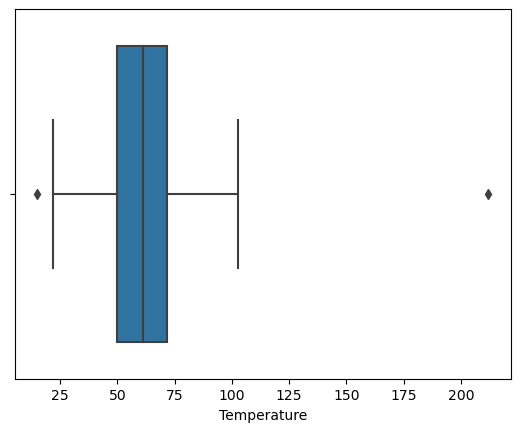

------------


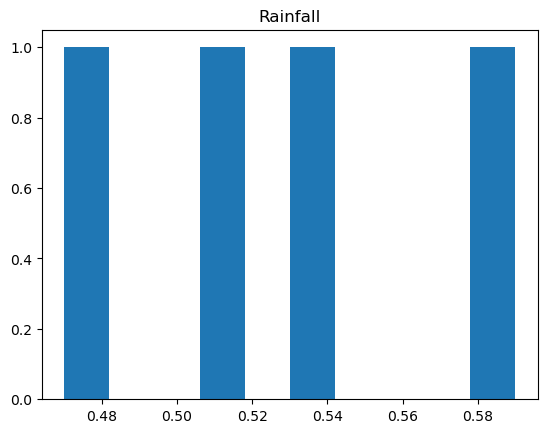

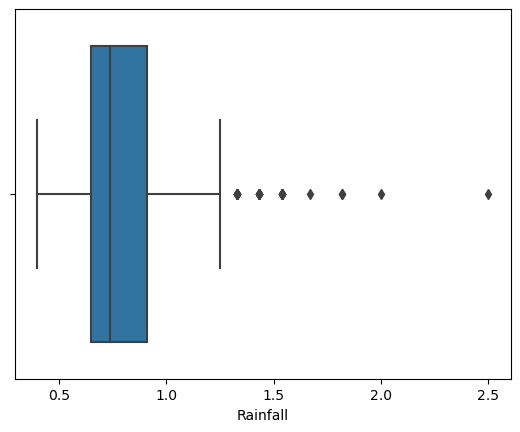

------------


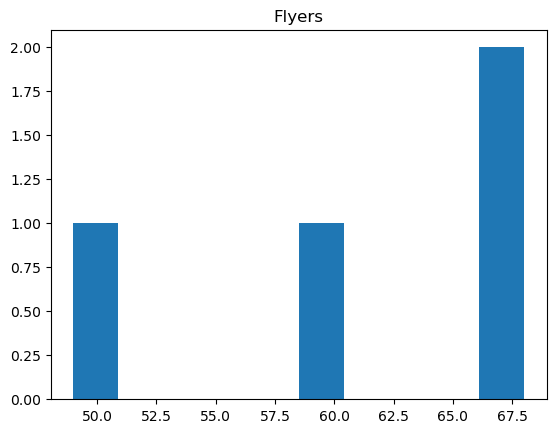

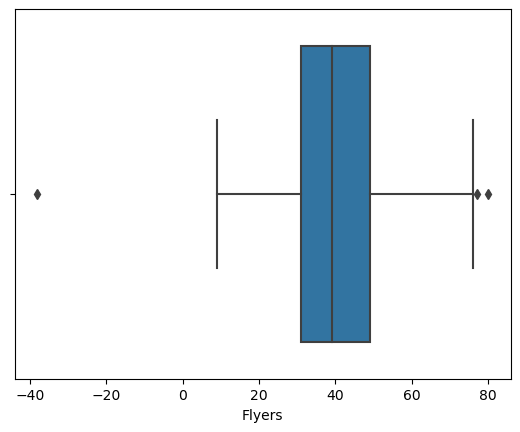

------------


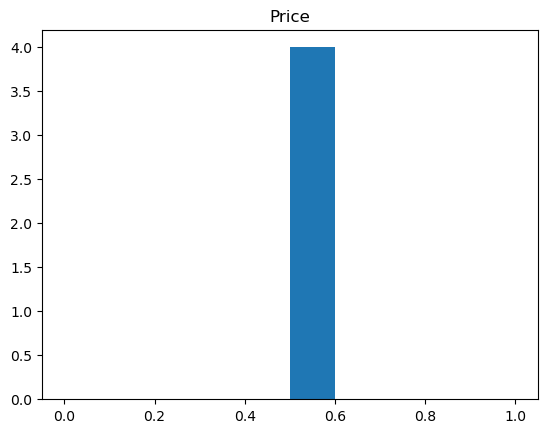

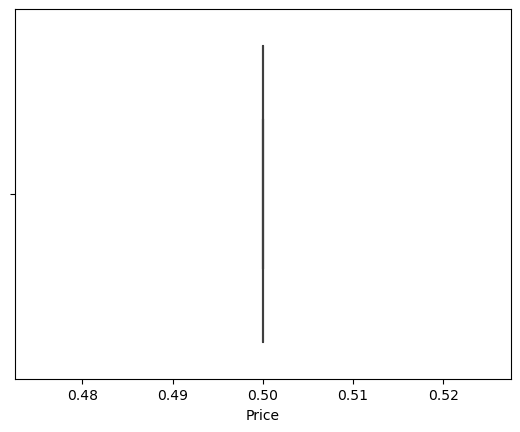

------------


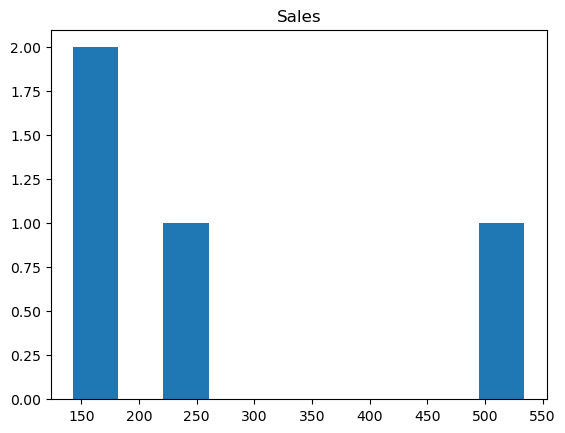

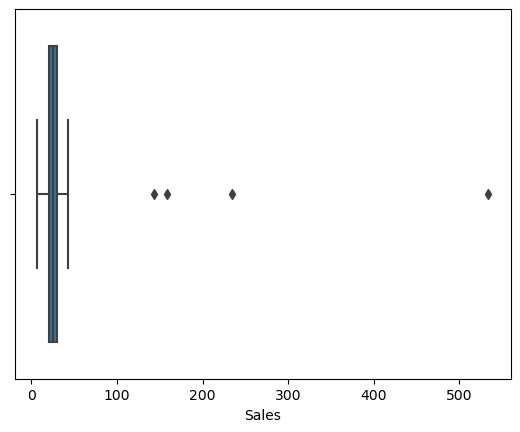

------------


In [9]:
df = pd.read_csv('lemonade.csv', index_col = 0)
inner_multiplier = 1.5

for col in cols:
    q1 = df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3- q1
    
    inner_upper_fence = q3 + (inner_multiplier * iqr)
    new_df = df[(df[col] > inner_upper_fence)]
    print(f'Column Name: {col}', new_df ,'\n')
    df = df.select_dtypes(exclude='object')
cols = df.columns.to_list()
for col in cols:
    plt.hist(new_df[col])
    plt.title(col.replace('_',' ').capitalize())
    plt.show()
    
    sns.boxplot(data=df, x=col)
    plt.show()
    print('------------')

## I would keep flyer and price the same without removing outliers

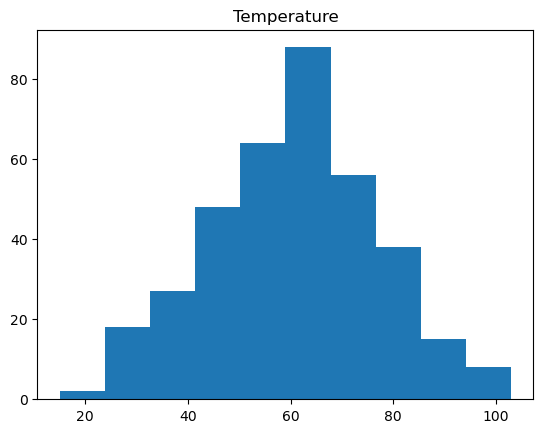

Column Name: Temperature      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[364 rows x 5 columns] 



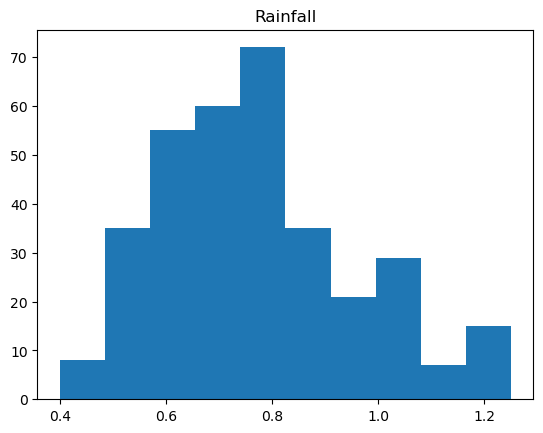

Column Name: Rainfall      Temperature  Rainfall  Flyers  Price  Sales
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
7           37.5      1.18      28    0.5     15
8           38.1      1.18      20    0.5     17
9           43.4      1.05      33    0.5     18
..           ...       ...     ...    ...    ...
357         35.8      1.25      26    0.5     16
358         35.5      1.25      19    0.5     15
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15

[337 rows x 5 columns] 



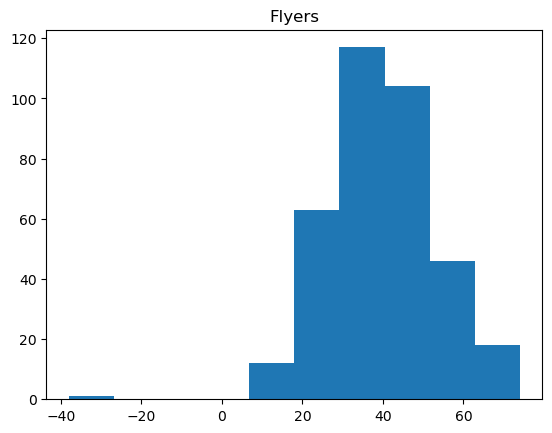

Column Name: Flyers      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[361 rows x 5 columns] 



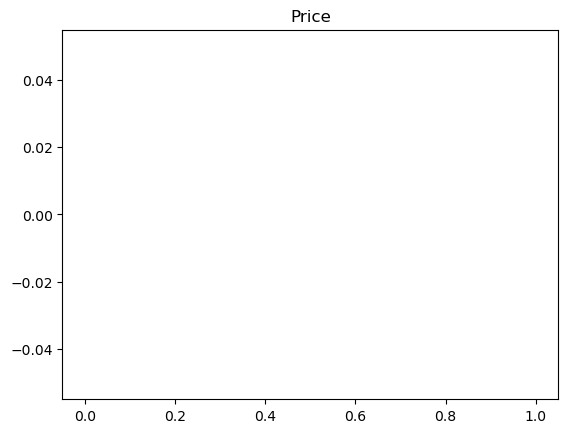

Column Name: Price Empty DataFrame
Columns: [Temperature, Rainfall, Flyers, Price, Sales]
Index: [] 



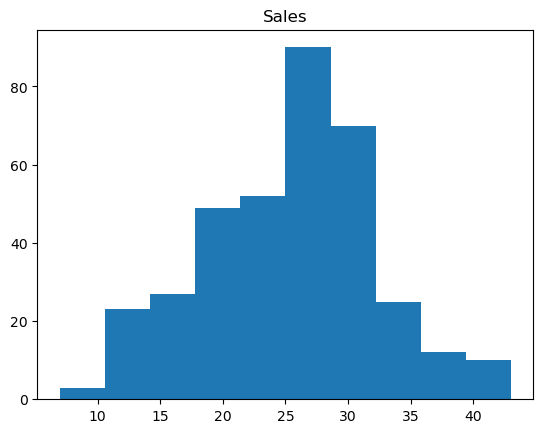

Column Name: Sales      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[361 rows x 5 columns] 



In [56]:
df = pd.read_csv('lemonade.csv', index_col = 0)
inner_multiplier = 1.5

for col in cols:
    df = pd.read_csv('lemonade.csv', index_col = 0)
    df = df.select_dtypes(exclude='object')
    
    q1 = df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3- q1
    
    inner_upper_fence = q3 + (inner_multiplier * iqr)
    
    df = df[(df[col] < inner_upper_fence)]
    
    plt.hist(df[col])
    plt.title(col.replace('_',' ').capitalize())
    plt.show()
    print(f'Column Name: {col}', df ,'\n')

## Same as above

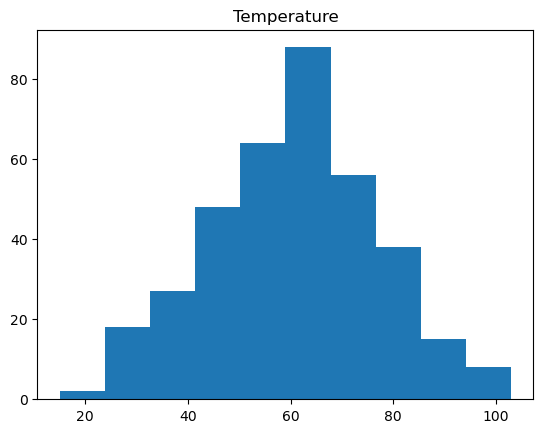

Column Name: Temperature      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[364 rows x 5 columns] 



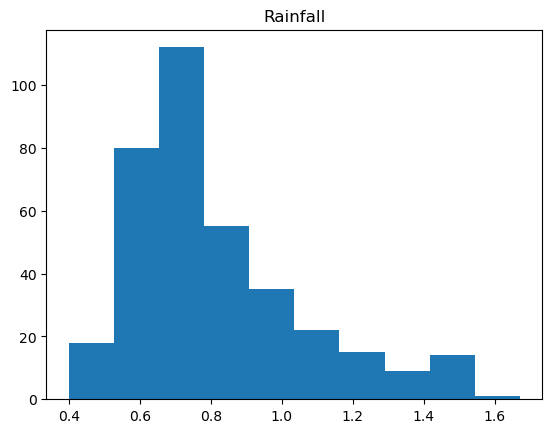

Column Name: Rainfall      Temperature  Rainfall  Flyers  Price  Sales
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
5           25.3      1.54      23    0.5     11
..           ...       ...     ...    ...    ...
359         28.9      1.43      23    0.5     13
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13

[361 rows x 5 columns] 



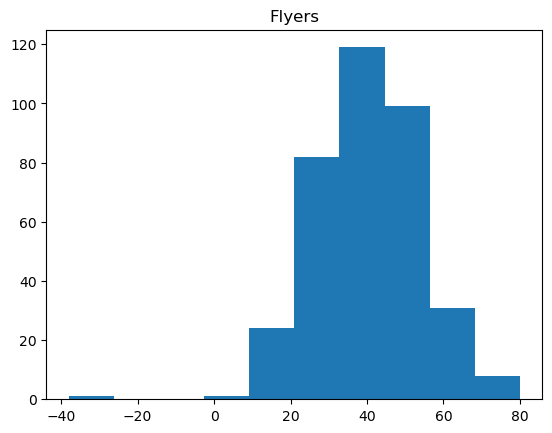

Column Name: Flyers      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[365 rows x 5 columns] 



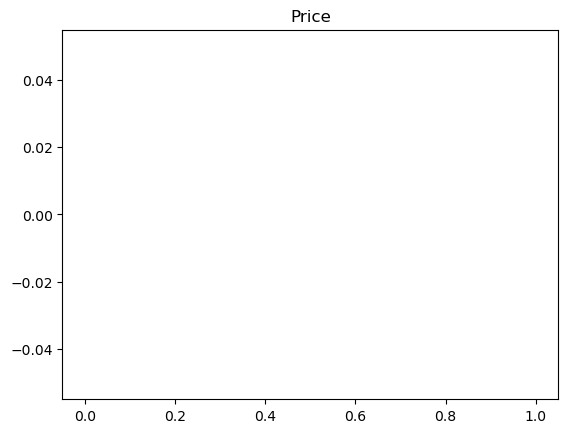

Column Name: Price Empty DataFrame
Columns: [Temperature, Rainfall, Flyers, Price, Sales]
Index: [] 



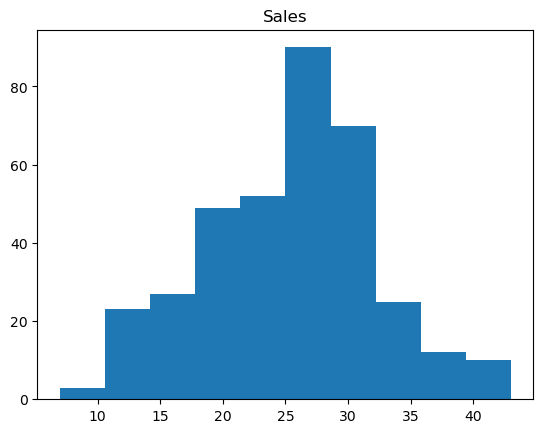

Column Name: Sales      Temperature  Rainfall  Flyers  Price  Sales
0           27.0      2.00      15    0.5     10
1           28.9      1.33      15    0.5     13
2           34.5      1.33      27    0.5     15
3           44.1      1.05      28    0.5     17
4           42.4      1.00      33    0.5     18
..           ...       ...     ...    ...    ...
360         42.7      1.00      33    0.5     19
361         37.8      1.25      32    0.5     16
362         39.5      1.25      17    0.5     15
363         30.9      1.43      22    0.5     13
364         15.1      2.50       9    0.5      7

[361 rows x 5 columns] 



In [55]:

cols = df.columns.to_list()

inner_multiplier = 3

for col in cols:
    df = pd.read_csv('lemonade.csv', index_col = 0)
    df = df.select_dtypes(exclude='object')
    
    q1 = df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3- q1
    
    inner_upper_fence = q3 + (inner_multiplier * iqr)
    
    df = df[(df[col] < inner_upper_fence)]
    
    plt.hist(df[col])
    plt.title(col.replace('_',' ').capitalize())
    plt.show()
    print(f'Column Name: {col}', df ,'\n')

# Both

In [12]:
# inner_multiplier = 1.5

# for col in cols:
#     q1 = df[col].quantile(0.25)
#     q3= df[col].quantile(0.75)
#     iqr= q3- q1
#     inner_lower_fence = q1 - (inner_multiplier * iqr)
#     inner_upper_fence = q3 + (inner_multiplier * iqr)
#     new_df = df[(df[col] < inner_lower_fence) | (df[col] > inner_upper_fence)]
#     print(f'Column Name: {col}', new_df ,'\n')

# Z scores 2

0     -1.892340
1     -1.787286
2     -1.477652
3     -0.946852
4     -1.040848
         ...   
359   -1.787286
360   -1.024260
361   -1.295189
362   -1.201194
363   -1.676702
Name: Temperature_zscores, Length: 355, dtype: float64


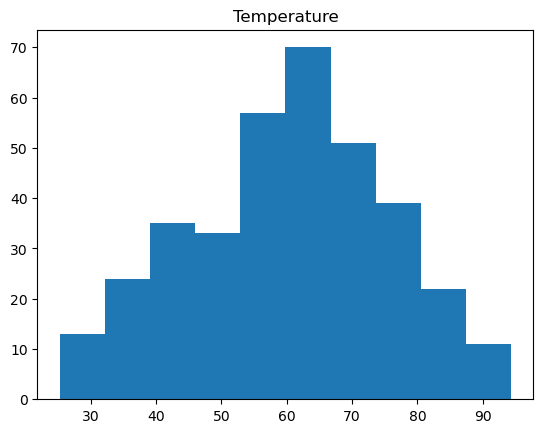

1      1.840253
2      1.840253
3      0.817946
4      0.635391
7      1.292588
         ...   
357    1.548165
358    1.548165
360    0.635391
361    1.548165
362    1.548165
Name: Rainfall_zscores, Length: 346, dtype: float64


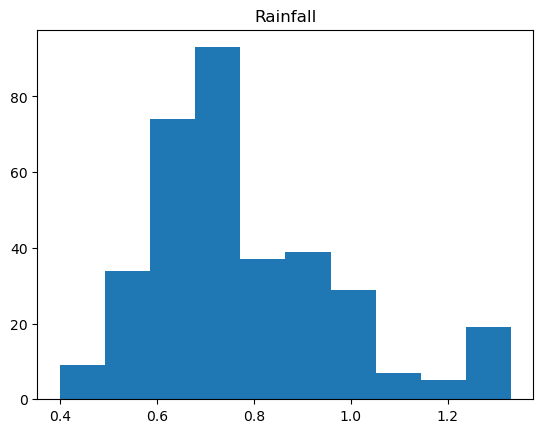

0     -1.820927
1     -1.820927
2     -0.950507
3     -0.877972
4     -0.515297
         ...   
359   -1.240647
360   -0.515297
361   -0.587832
362   -1.675857
363   -1.313182
Name: Flyers_zscores, Length: 352, dtype: float64


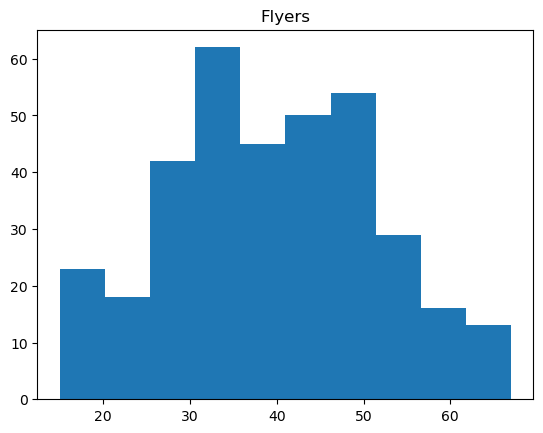

Series([], Name: Price_zscores, dtype: float64)


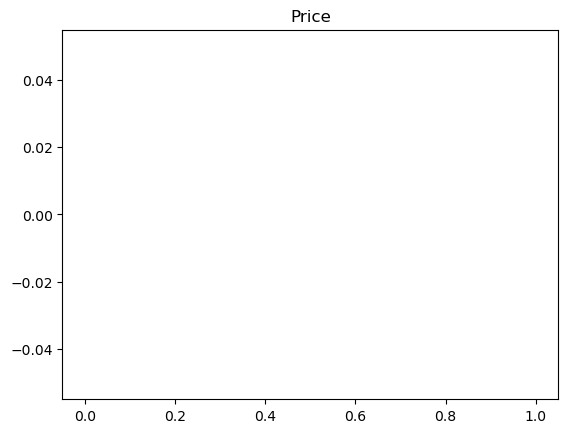

0     -0.577281
1     -0.480344
2     -0.415720
3     -0.351096
4     -0.318783
         ...   
360   -0.286471
361   -0.383408
362   -0.415720
363   -0.480344
364   -0.674217
Name: Sales_zscores, Length: 361, dtype: float64


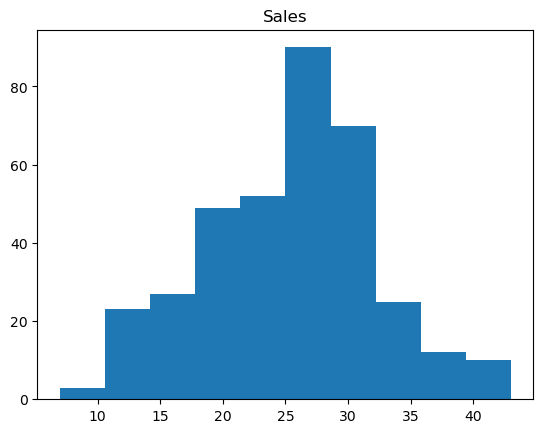

In [46]:
df = pd.read_csv('lemonade.csv', index_col = 0)
df = df.select_dtypes(exclude='object')
cols = df.columns.to_list()

for col in cols:
    df[f'{col}_zscores'] = (df[col] - df[col].mean()) / df[col].std()
    print(df[f'{col}_zscores'][df[f'{col}_zscores'].abs() < 2])
    plt.hist(df[col][df[f'{col}_zscores'].abs() < 2])
    plt.title(col.replace('_',' ').capitalize())
    plt.show()

# Z scores 3

0     -1.892340
1     -1.787286
2     -1.477652
3     -0.946852
4     -1.040848
         ...   
360   -1.024260
361   -1.295189
362   -1.201194
363   -1.676702
364   -2.550311
Name: Temperature_zscores, Length: 364, dtype: float64


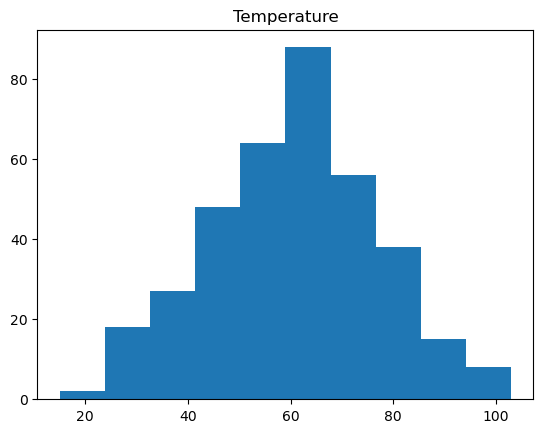

1      1.840253
2      1.840253
3      0.817946
4      0.635391
5      2.606983
         ...   
359    2.205363
360    0.635391
361    1.548165
362    1.548165
363    2.205363
Name: Rainfall_zscores, Length: 360, dtype: float64


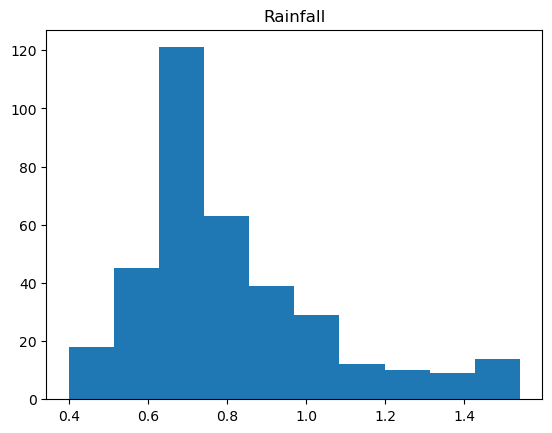

0     -1.820927
1     -1.820927
2     -0.950507
3     -0.877972
4     -0.515297
         ...   
360   -0.515297
361   -0.587832
362   -1.675857
363   -1.313182
364   -2.256137
Name: Flyers_zscores, Length: 364, dtype: float64


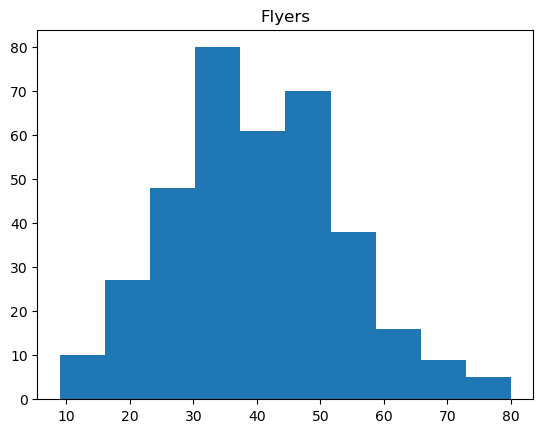

Series([], Name: Price_zscores, dtype: float64)


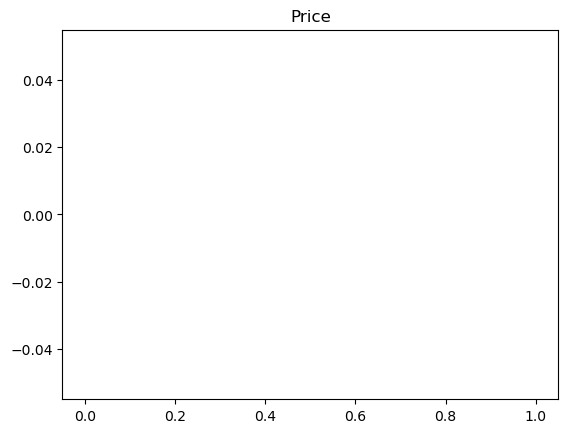

0     -0.577281
1     -0.480344
2     -0.415720
3     -0.351096
4     -0.318783
         ...   
360   -0.286471
361   -0.383408
362   -0.415720
363   -0.480344
364   -0.674217
Name: Sales_zscores, Length: 361, dtype: float64


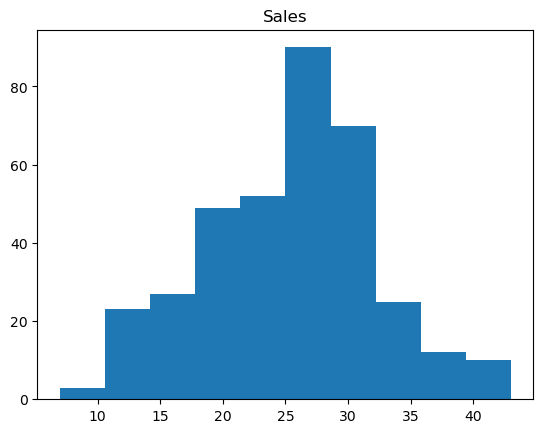

In [45]:
df = pd.read_csv('lemonade.csv', index_col = 0)
df = df.select_dtypes(exclude='object')
cols = df.columns.to_list()

for col in cols:
    df[f'{col}_zscores'] = (df[col] - df[col].mean()) / df[col].std()
    print(df[f'{col}_zscores'][df[f'{col}_zscores'].abs() < 3])
    plt.hist(df[col][df[f'{col}_zscores'].abs() < 3])
    plt.title(col.replace('_',' ').capitalize())
    plt.show()


    
    

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  365 non-null    float64
 1   Rainfall     365 non-null    float64
 2   Flyers       365 non-null    int64  
 3   Price        365 non-null    float64
 4   Sales        365 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 17.1 KB
